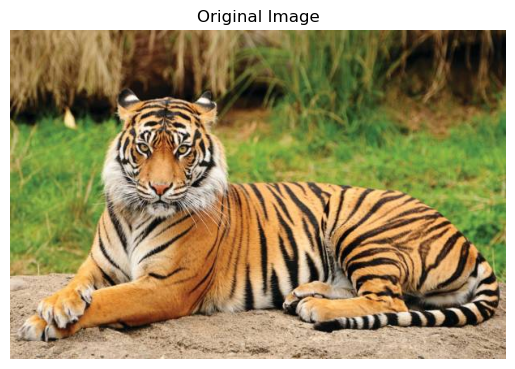

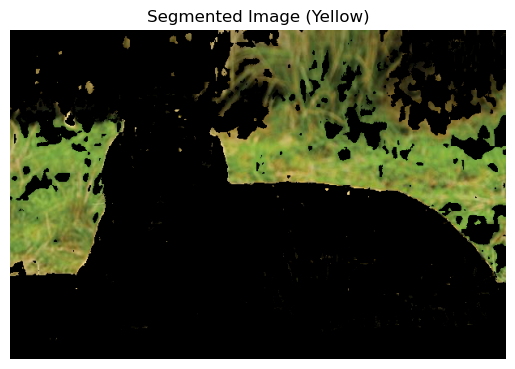

In [1]:
#In[41]:Import necessary packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
# In[42]:Read the image and convert the image into RGB
image_path = 'Tiger.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# In[44]:Display the image
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()
# In[45]:Set the pixels to display the ROI
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([22, 93, 0])#choose the RGB values accordingly to display spec
upper_yellow = np.array([45, 255, 255])
mask = cv2.inRange(hsv_img, lower_yellow, upper_yellow)
# In[48]:Perform bit wise conjunction of the two arrays using bitwise_and
segmented_image = cv2.bitwise_and(img, img, mask=mask)
# In[49]:Convert the image from BGR2RGB
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
# In[50]:Display the segmented ROI from an image.
plt.imshow(segmented_image_rgb)
plt.title('Segmented Image (Yellow)')
plt.axis('off')
plt.show()

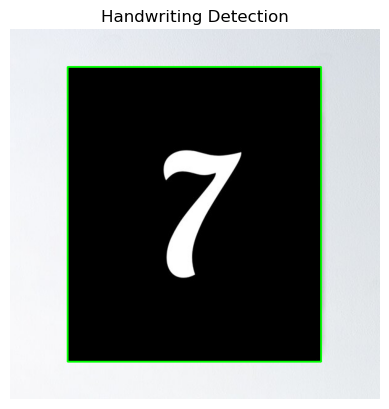

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_handwriting(image_path):
    # Read the image
    img = cv2.imread(image_path)
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Use Canny edge detector to find edges in the image
    edges = cv2.Canny(blurred, 50, 150)
    # Find contours in the edged image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Filter contours based on area to keep only potential text regions
    min_area = 100
    text_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]
    # Display the result
    image_copy = img.copy()
    for contour in text_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # Display the result
        img_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.title('Handwriting Detection')
        plt.axis('off')
        plt.show()

# Path to the image containing handwriting
image_path = '7.jpg'
# Perform handwriting detection
detect_handwriting(image_path)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80
[3]


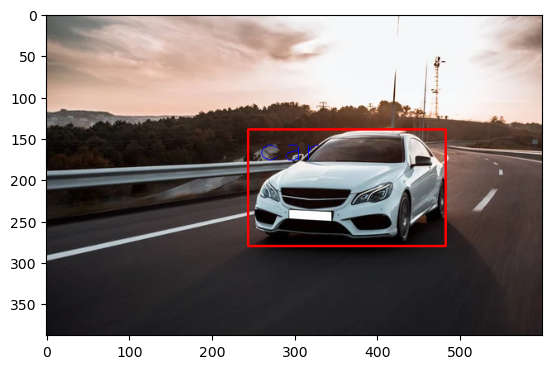

In [18]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

model=cv2.dnn_DetectionModel(frozen_model,config_file)

classLabels = []
file_name='Labels.txt'
with open(file_name,'rt')as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

print(classLabels)
print(len(classLabels))
img=cv2.imread('car.jpg')
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)#255/2=127.5
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(0,0,255),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(255,0,0),thickness=1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))